<a href="https://colab.research.google.com/github/avinash791/Airbnb/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
import pandas as pd
import numpy as np
from numpy import mean
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path='/content/Airbnb NYC 2019.csv'
airbnb_df=pd.read_csv(path)
airbnb_df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# **Data** **Exploration** **and** **variable** **Identification**

In [ ]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
airbnb_df.describe() 

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
airbnb_df[airbnb_df['price']==0] #11hotels have zero price 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,NaN,NaN,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


In [ ]:
#checking all the columns variable
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
#check id are same or diffrent 
airbnb_df['id'].nunique()

48895

In [ ]:
airbnb_df[airbnb_df['host_name']=='John'] #expermenting (one host have diffrent airbnb like john have 294 airbnd )


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
429,148201,NYC - Sunny Greenwich Village 1br,715807,John,Manhattan,Greenwich Village,40.72831,-74.00177,Entire home/apt,175,3,18,2013-05-31,0.19,1,0
620,234870,Private Room With GREAT Location,1229984,John,Queens,Long Island City,40.74581,-73.95295,Private room,75,30,65,2017-07-31,0.74,3,219
991,400039,Big Beautiful Railroad in Brooklyn,1488809,John,Brooklyn,Bushwick,40.70339,-73.92945,Entire home/apt,130,30,53,2017-06-30,0.68,1,0
1141,484297,Large home in most desirable Brooklyn hood!,2397411,John,Brooklyn,Clinton Hill,40.68545,-73.96534,Entire home/apt,350,4,10,2018-09-12,0.12,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47624,35836317,Gorgeous Duplex 2BED/1.5BA Modern,269242923,John,Manhattan,Kips Bay,40.74490,-73.97888,Entire home/apt,288,5,2,2019-06-30,2.00,1,74
47689,35871036,Huge 1 bedroom w/ a backyard near the heart of...,226414996,John,Queens,Ditmars Steinway,40.77170,-73.90799,Entire home/apt,90,3,0,NaN,NaN,2,21
47915,35984474,Perfect Weekend Stay,229739739,John,Brooklyn,Flatbush,40.64726,-73.95455,Private room,85,14,0,NaN,NaN,2,176
48212,36140542,Wonderful Summer Vacation Getaways For Weeken...,229739739,John,Brooklyn,Flatbush,40.64600,-73.95455,Private room,85,7,0,NaN,NaN,2,176


In [ ]:
airbnb_df[airbnb_df['name']=='Clean & quiet apt home by the park']
airbnb_df['name'].nunique()  #some hotels have name repeated 

47905

In [ ]:
airbnb_df[airbnb_df['host_name']=='John']['name'].nunique() #indiviual name have multiple airbnb

293

In [ ]:
airbnb_df['neighbourhood'].nunique() #221 loctions are avilable for airbnb

221

In [ ]:
airbnb_df[['host_name','neighbourhood']].head(20)

,host_name,neighbourhood
0,John,Kensington
1,Jennifer,Midtown
2,Elisabeth,Harlem
3,LisaRoxanne,Clinton Hill
4,Laura,East Harlem
5,Chris,Murray Hill
6,Garon,Bedford-Stuyvesant
7,Shunichi,Hell's Kitchen
8,MaryEllen,Upper West Side
9,Ben,Chinatown


In [ ]:
airbnb_df['name'].value_counts() #some property is not listed yet or dont have host name 

Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Large 1BR Apt. in Williamsburg                         1
Feel at Home                                           1
Spacious Modern Alcove Studio in a Luxury Building     1
Artist's Room in Large Apartment                       1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: name, Length: 47905, dtype: int64

In [ ]:
airbnb_df['name'].value_counts() #47905  are listed yet some property are not listed or dont have host name 

Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Large 1BR Apt. in Williamsburg                         1
Feel at Home                                           1
Spacious Modern Alcove Studio in a Luxury Building     1
Artist's Room in Large Apartment                       1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: name, Length: 47905, dtype: int64

In [ ]:
airbnb_df[airbnb_df['name']==airbnb_df['host_name']]  # here some host name and property name is same 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9473,7264659,Olivier,6994503,Olivier,Manhattan,Upper West Side,40.78931,-73.97520,Entire home/apt,200,5,12,2018-01-30,0.25,1,25
10682,8212051,Monty,43302952,Monty,Brooklyn,East Flatbush,40.66383,-73.92706,Shared room,95,2,7,2015-10-30,0.15,1,238
16422,13186374,Sean,35143476,Sean,Brooklyn,Windsor Terrace,40.65182,-73.98043,Entire home/apt,400,7,0,NaN,NaN,1,0
23996,19348168,Cyn,74033595,Cyn,Brooklyn,Bedford-Stuyvesant,40.67850,-73.91478,Private room,75,2,1,2018-09-10,0.10,1,0
24152,19456810,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70454,-73.81549,Private room,93,1,2,2017-07-23,0.08,18,90
24607,19785737,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70445,-73.81399,Private room,135,1,1,2017-10-08,0.05,18,180
26734,21231543,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70428,-73.81353,Private room,135,1,0,NaN,NaN,18,365
26752,21243952,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70288,-73.81531,Private room,135,1,1,2018-01-02,0.05,18,365
26753,21244035,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70319,-73.81410,Private room,135,1,2,2018-06-10,0.09,18,365
26889,21311903,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70258,-73.81510,Private room,135,1,0,NaN,NaN,18,365


In [ ]:
airbnb_df[airbnb_df['name']=='Hillside Hotel']  #same property  with different room_types & varied price ranges

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
24152,19456810,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70454,-73.81549,Private room,93,1,2,2017-07-23,0.08,18,90
24607,19785737,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70445,-73.81399,Private room,135,1,1,2017-10-08,0.05,18,180
26734,21231543,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70428,-73.81353,Private room,135,1,0,NaN,NaN,18,365
26752,21243952,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70288,-73.81531,Private room,135,1,1,2018-01-02,0.05,18,365
26753,21244035,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70319,-73.81410,Private room,135,1,2,2018-06-10,0.09,18,365
26889,21311903,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70258,-73.81510,Private room,135,1,0,NaN,NaN,18,365
26891,21312075,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70333,-73.81380,Private room,135,1,0,NaN,NaN,18,365
26892,21312191,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70259,-73.81415,Private room,135,1,0,NaN,NaN,18,365
26893,21312225,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70262,-73.81526,Private room,135,1,1,2017-12-10,0.05,18,365
26894,21312283,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70450,-73.81447,Private room,135,1,0,NaN,NaN,18,355


In [ ]:
airbnb_df['host_name'].value_counts()


Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: host_name, Length: 11452, dtype: int64

In [ ]:
airbnb_df[airbnb_df['host_name']=='Michael'] #EXPERIMENTING HOST'S HAVE DIFFRENT LOCATION LOCATION 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
151,36121,Lg Rm in Historic Prospect Heights,62165,Michael,Brooklyn,Prospect Heights,40.67386,-73.96641,Private room,85,15,9,2013-05-10,0.09,1,339
412,138216,Sunny and Spacious Designer's Home,674970,Michael,Brooklyn,Greenpoint,40.72212,-73.94254,Entire home/apt,141,5,8,2018-07-08,0.21,1,9
519,189135,Hell's Kitchen Funky 80's Hideaway!,179020,Michael,Manhattan,Hell's Kitchen,40.76311,-73.99388,Private room,99,1,89,2019-07-01,1.00,1,353
616,233189,NYC Studio in Heart of Times Square,1220414,Michael,Manhattan,Hell's Kitchen,40.76166,-73.99675,Entire home/apt,179,30,83,2019-05-31,0.88,1,292
811,289037,"2BR in Cobble Hill, Brooklyn, NY",632334,Michael,Brooklyn,Carroll Gardens,40.68353,-73.99140,Entire home/apt,189,2,13,2016-09-05,0.18,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48378,36228909,Sunny SoHo Penthouse w/ Pvt. Terrace!,272485928,Michael,Manhattan,SoHo,40.72336,-74.00465,Entire home/apt,600,3,0,NaN,NaN,1,179
48531,36310247,Spacious 1 Bedroom With Private Garden,25498509,Michael,Brooklyn,Clinton Hill,40.68183,-73.96464,Entire home/apt,100,1,0,NaN,NaN,1,6
48786,36426788,Serene Room 5 mins from JFK / 15 mins from LGA,266645207,Michael,Queens,Laurelton,40.67025,-73.74548,Private room,75,1,0,NaN,NaN,2,180
48830,36450318,"LUXURY, PRIVATE APT ACROSS FROM EMPIRE STATE",151831356,Michael,Manhattan,Midtown,40.74607,-73.98599,Entire home/apt,199,1,0,NaN,NaN,1,14


In [ ]:
airbnb_price=airbnb_df.groupby('neighbourhood_group')['price'].mean().reset_index()


airbnb_price

,neighbourhood_group,price
0,Bronx,87.496792
1,Brooklyn,124.383207
2,Manhattan,196.875814
3,Queens,99.517649
4,Staten Island,114.812332


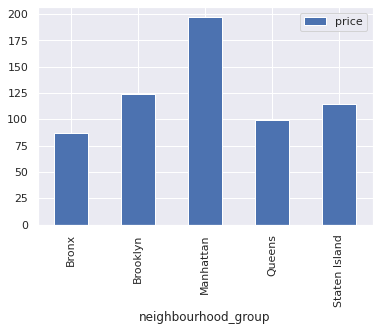

In [ ]:
airbnb_price.plot('neighbourhood_group','price',kind='bar') #manhattan have  the most costly airbnb 

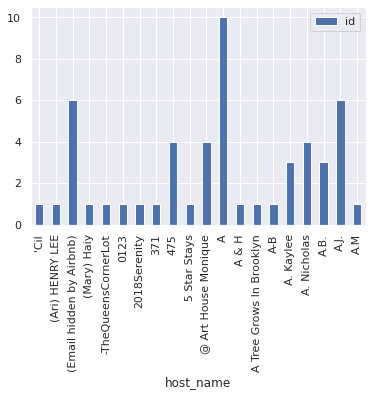

In [ ]:
airbnb_host=airbnb_df.groupby('host_name')['id'].count().reset_index()[:20]
airbnb_host.plot('host_name','id',kind='bar')

**What can we learn from predictions? (ex: locations, prices, reviews, etc)**

In [ ]:
airbnb_reviews=airbnb_df.groupby('neighbourhood_group')['number_of_reviews'].count().reset_index()
airbnb_reviews

,neighbourhood_group,number_of_reviews
0,Bronx,1091
1,Brooklyn,20104
2,Manhattan,21661
3,Queens,5666
4,Staten Island,373


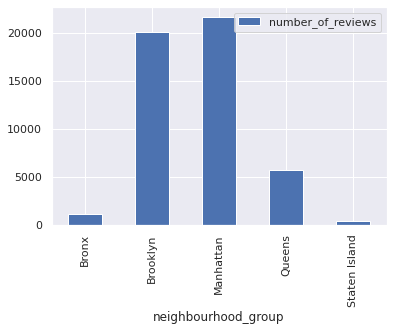

In [ ]:
airbnb_reviews.plot('neighbourhood_group','number_of_reviews',kind='bar')

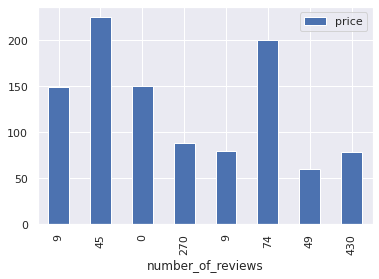

In [ ]:
price_reviews=airbnb_df[['price','number_of_reviews']][:8]
price_reviews.plot('number_of_reviews','price',kind='bar')

**Which hosts are the busiest and why?**

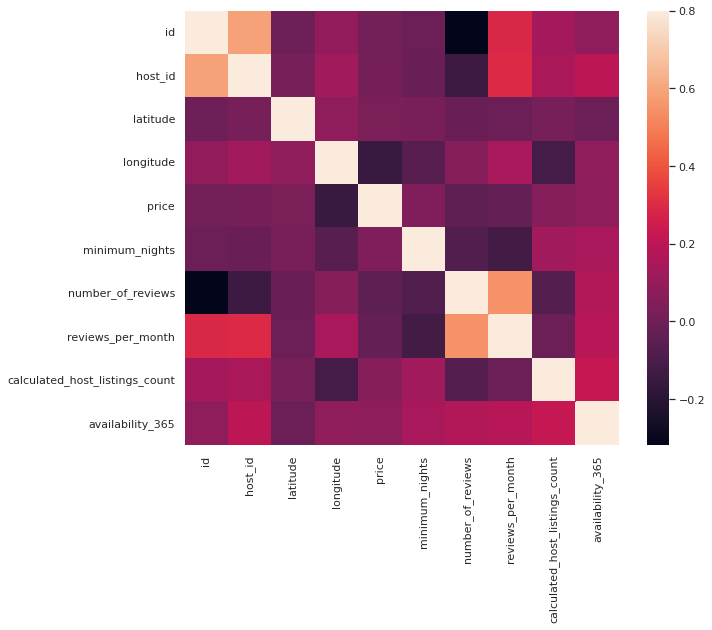

In [ ]:
#correlation matrix
corrmat = airbnb_df.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
listings_count_df=airbnb_df['name'].value_counts()[:5].reset_index()
listings_count_df.rename(columns={'index':'Listings on Airbnb','name':'Total_listings'},inplace=True)
listings_count_df        #hillside hotel is busiest 

,Listings on Airbnb,Total_listings
0,Hillside Hotel,18
1,Home away from home,17
2,New york Multi-unit building,16
3,Brooklyn Apartment,12
4,Loft Suite @ The Box House Hotel,11


In [ ]:
top_10_hosts=airbnb_df['host_name'].value_counts()[:10] #top 10 hosts on the basis of no of listings in entire NYC!
top_10_hosts

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: host_name, dtype: int64

Text(0.5, 1.0, 'top 10 hosts on the basis of no of listings in entire NYC!')

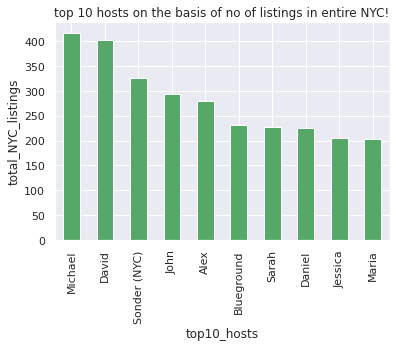

In [ ]:
top_10_hosts.plot(kind='bar',color='g')
plt.xlabel('top10_hosts')
plt.ylabel('total_NYC_listings')
plt.title('top 10 hosts on the basis of no of listings in entire NYC!') #michael is busiesthost

Text(0.5, 1.0, 'Count of no of listings in entire NYC of each neighbourhood group!')

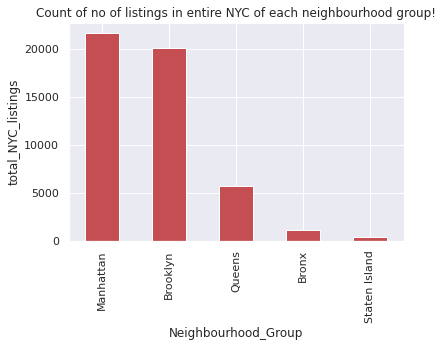

In [ ]:
#the neighbourhood group 'Manhattan' has the highest no of listings in entire NYC! 
airbnb_df['neighbourhood_group'].value_counts().plot(kind='bar',color='r')
plt.xlabel('Neighbourhood_Group')
plt.ylabel('total_NYC_listings')
plt.title('Count of no of listings in entire NYC of each neighbourhood group!') 

Text(0.5, 1.0, 'Top neighbourhoods in entire NYC on the basis of count of listings')

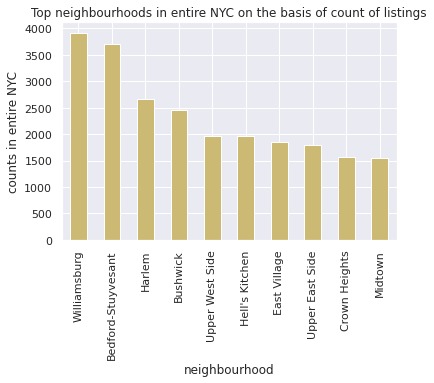

In [ ]:
top_10_neigbours= airbnb_df['neighbourhood'].value_counts()[:10] #checking top 10 neighbourhoods on the basis of no of listings in entire NYC!
top_10_neigbours.plot(kind='bar',color='y')
plt.xlabel('neighbourhood')
plt.ylabel('counts in entire NYC')
plt.title('Top neighbourhoods in entire NYC on the basis of count of listings')

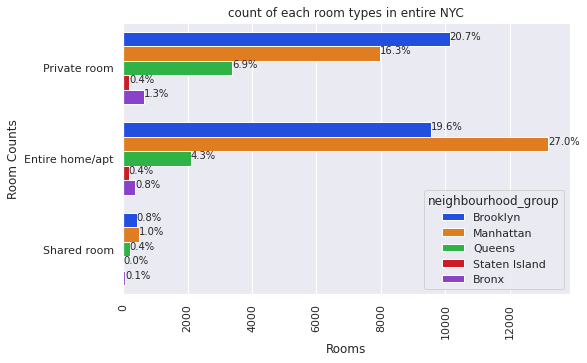

In [ ]:
plt.rcParams['figure.figsize'] = (8, 5)
ax= sns.countplot(y='room_type',hue='neighbourhood_group',data=airbnb_df,palette='bright')

total = len(airbnb_df['room_type'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('count of each room types in entire NYC')
plt.xlabel('Rooms')
plt.xticks(rotation=90)
plt.ylabel('Room Counts')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


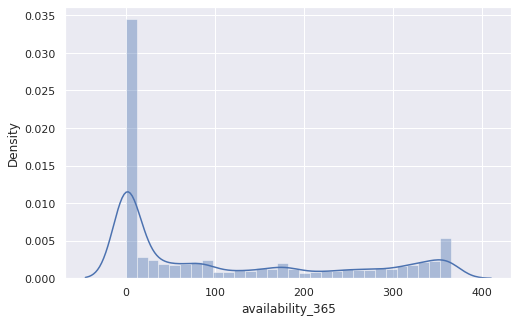

In [ ]:
sns.distplot(airbnb_df['availability_365'])

**Room_types vs price on different neighbourhood groups!**

In [ ]:
airbnb_df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

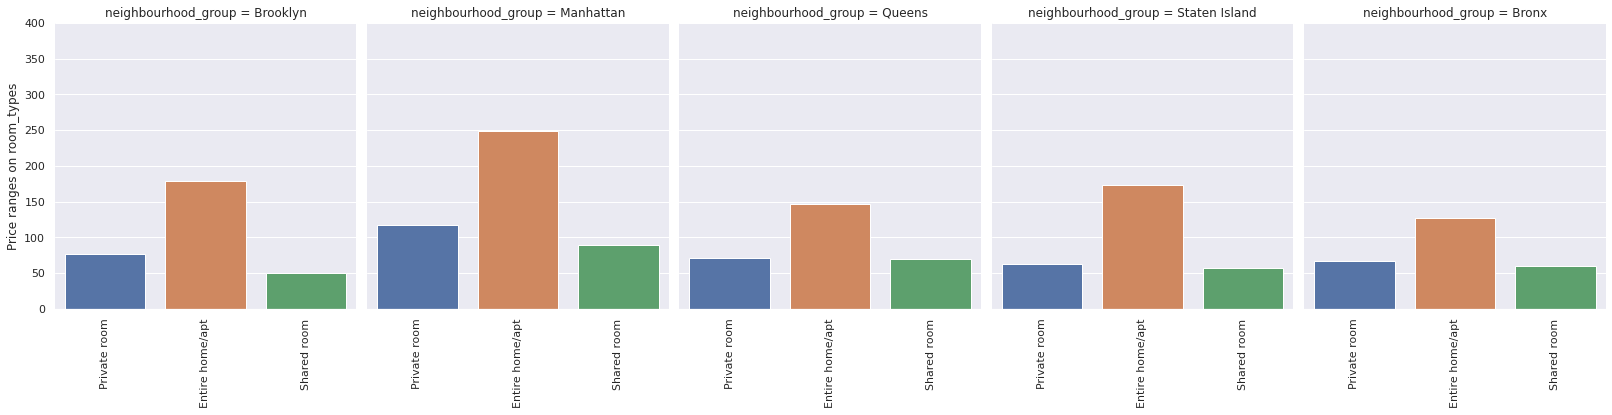

In [ ]:
#room_type vs price
g = sns.catplot(x="room_type", y="price", col="neighbourhood_group",
                data=airbnb_df, saturation=.8,
                kind="bar",ci=None,  aspect=.9)
(g.set_axis_labels("", "Price ranges on room_types")
  .set_xticklabels(["Private room", "Entire home/apt", "Shared room"],rotation=90)
  .set(ylim=(0, 400))
  .despine(left=True)) 

In [ ]:
#top 10 most reviewed listings in NYC!
top10_reviewed_listings= airbnb_df.nlargest(10,'reviews_per_month')
top10_reviewed_listings[['name','reviews_per_month','neighbourhood_group']]

,name,reviews_per_month,neighbourhood_group
42075,Enjoy great views of the City in our Deluxe Room!,58.50,Manhattan
42076,Great Room in the heart of Times Square!,27.95,Manhattan
38870,Lou's Palace-So much for so little,20.94,Queens
27287,JFK Comfort.5 Mins from JFK Private Bedroom & ...,19.75,Queens
28651,JFK 2 Comfort 5 Mins from JFK Private Bedroom,17.82,Queens
29628,JFK 3 Comfort 5 Mins from JFK Private Bedroom,16.81,Queens
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,16.22,Queens
22469,Cute Tiny Room Family Home by LGA NO CLEANING FEE,16.03,Queens
36238,“For Heaven Cakes”,15.78,Queens
40297,Studio Apartment 6 minutes from JFK Airport,15.32,Queens


**Is there any noticeable difference of traffic among different areas and what could be the reason for it?**

Text(0.5, 1.0, 'Location Co-ordinates')

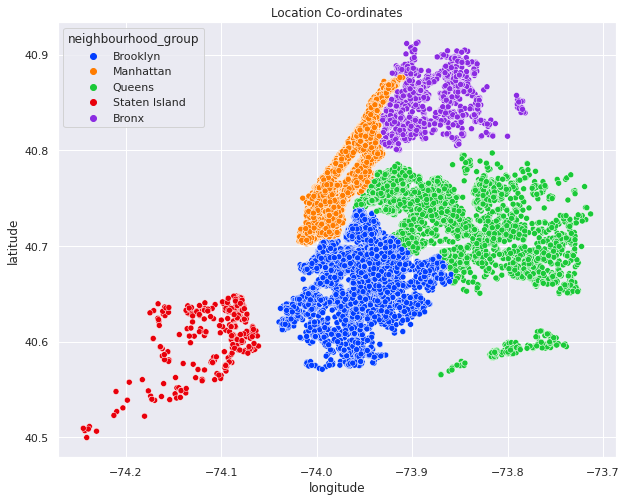

In [ ]:
#trying to find where the coordinates belong from the latitude and longitude
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(data=airbnb_df, x="longitude", y="latitude",hue='neighbourhood_group',palette='bright')
ax.set_title('Location Co-ordinates')

Text(0.5, 1.0, 'Distribution of type of rooms across NYC')

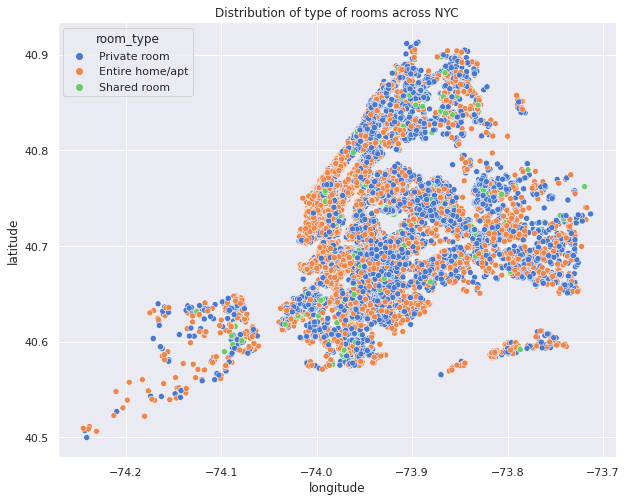

In [ ]:
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(x=airbnb_df.longitude, y=airbnb_df.latitude,hue=airbnb_df.room_type,palette='muted')
ax.set_title('Distribution of type of rooms across NYC')

**price accross area**

In [ ]:
lat_long=airbnb_df.plot(kind='scatter', x='longitude', y='latitude', label='prices?', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
lat_long.legend()